**GRUPO <7>**

Pilar Arias, Álvaro García Cid, Yedra Martín, Amaya Sarasa


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Comprobamos las dimensiones de los datos proporcionados:

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Efectivamente, encontramos 60000 imágenes para el entrenamiento, de 28*28 píxeles. Más adelante deberemos cambiar las dimensiones de las imágenes, para así poderlas entrar correctamente a la primera capa de la red neuronal. 

A continuación, probamos a ver cómo se vería representada la imagen número 999:

In [ ]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(test_images[1000]))

[[  0   0   1   0   0   0   0   0  84  80   0   0   0   0   0   0   0   0   0  13  97   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  48 161 189 197   0   0   0   0   0   1   0   0   0 178 195 161  79   0   0   0   0   0]
 [  0   0   0   0   0  66 210 202 201 193 106   0   0   1   1   0   0   0 134 195 179 165 221  74   0   0   0   0]
 [  0   0   0   0   3 196 178 187 186 166 186 132   0   0   0   0   0 104 182 153 192 183 179 182  27   0   0   0]
 [  0   0   1   0 136 204 184 106 169 201 184 208 186  80  50 105 206 213 191 199 205 160 157 170 163   0   0   0]
 [  0   0   0   0 188 173 200 199 231 171 162 209 136 244 174 241 179 147 179 130 215 173 134 189 176   6   0   0]
 [  0   0   0  35 186 195 183 126 184 160 165 160 148 174 152 157 144 179 162 171 156 186 132 122 201  76   0   0]
 [  0   0   0 114 186 184 202 196 197 131 209 180 202 167 144 221 174 213 171 154 227 176 127 193 189 193   0   0]
 [  0   0   0 223 183 165 166 173 200 163 161 200 149 204 124 184 165 157 182 11

Se puede asemejar a una camiseta, y efectivamente, comprobando con la etiqueta que se proporciona, se está representando de manera correcta.

In [ ]:
test_labels[1000]


0

Probamos otra manera de representar la imagen. 

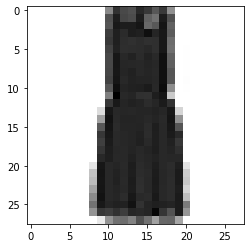

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[2]))

60000
(60000, 784)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.46 0.09 0.   0.   0.   0.   0.   0.19 0.35 0.02 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.39 0.83 0.8  0.73 0.7  0.68 0.73 0.76 0.87 0.56 0.33 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33 0.3  0.78 0.88 0.97 1.   0.93 0.89 0.62 0.27 0.31 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.36 0.27 0.36 0.79 0.85 0.88 0.82 0.62 0.24 0.36 0.28 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.31 0.35 0.24 0.23 0.34 0.42 0.29 0.22 0.3  0.38 0.29 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.29 0.35 0.31 0.31 0.26 0.25 0.29 0.33 0.31 0.38 0.28 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.3  0.35 0.3  0.31 0.33 0.33 0.33 0.33 0.32 0.37 0.3  0.   0.   0.   0.   0.   0.   0.   0.
 

In [ ]:
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_test_labels)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


CASO 1

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


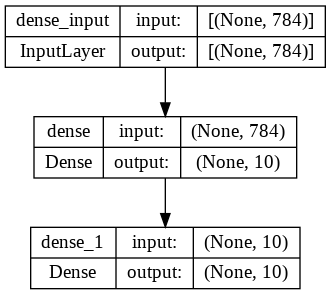

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

In [ ]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.2531 - accuracy: 0.5969
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7708 - accuracy: 0.7383
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6681 - accuracy: 0.7781
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6136 - accuracy: 0.7977
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5791 - accuracy: 0.8097


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax (predictions_array)
  if predicted_label== true_label:
    color = 'blue' 
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(test_labels[predicted_label],
                                100*np.max(predictions_array),
                                test_labels[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
 

Ejemplo de uso para ver la predicción de la 6ª figura de las imágenes de test.

In [ ]:
predictions = network.predict(test_images)

313/313 [==============================] - 0s 1ms/step


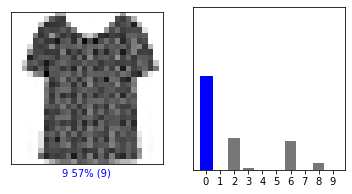

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(1000, predictions[1000], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(1000, predictions[1000], test_labels)
plt.show()

CASO 2

In [ ]:
from keras import models
from keras import layers
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


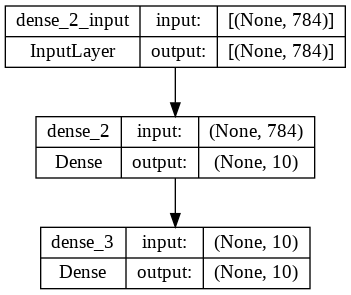

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network2, "my_first_model.png", show_shapes=True)

In [ ]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network2.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.8441 - accuracy: 0.7419
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.8260
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4639 - accuracy: 0.8410
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.8478
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8514


In [ ]:
network2.fit(train_images, one_hot_train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.8557
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4138 - accuracy: 0.8566
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4065 - accuracy: 0.8591
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8612
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3961 - accuracy: 0.8625
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8641
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8646
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3859 - accuracy: 0.8659
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.8675
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3802 - accuracy: 0.8672

CASO 3

In [ ]:
from keras import models
from keras import layers
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


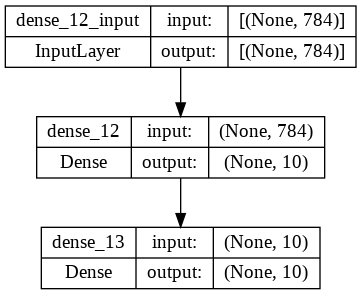

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network3, "my_first_model.png", show_shapes=True)

In [ ]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network3.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.0856 - accuracy: 0.3056
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.7692 - accuracy: 0.5328
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 1.5830 - accuracy: 0.5608
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4461 - accuracy: 0.5834
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 1.3388 - accuracy: 0.6047


CASO 4

In [ ]:
from keras import models
from keras import layers
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                7850      
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


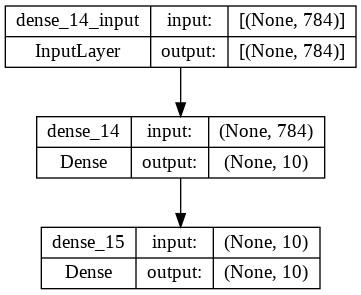

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network4, "my_first_model.png", show_shapes=True)

In [ ]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network4.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.3320 - accuracy: 0.6514
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8074 - accuracy: 0.7598
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6270 - accuracy: 0.7964
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5441 - accuracy: 0.8220
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5000 - accuracy: 0.8331


CASO 5

In [ ]:
from keras import models
from keras import layers
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


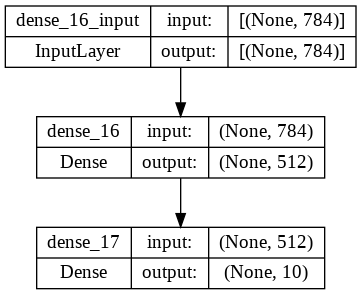

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network5, "my_first_model.png", show_shapes=True)

In [ ]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network5.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 1.0351 - accuracy: 0.6810
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6671 - accuracy: 0.7869
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5881 - accuracy: 0.8099
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5453 - accuracy: 0.8213
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5179 - accuracy: 0.8277


CASO 6

In [ ]:
from keras import models
from keras import layers
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


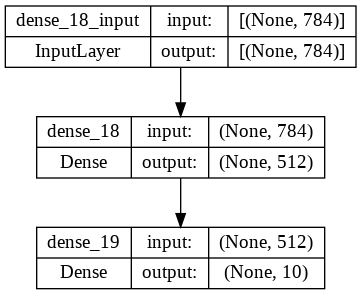

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network6, "my_first_model.png", show_shapes=True)

In [ ]:
network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network6.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5558 - accuracy: 0.8026
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3833 - accuracy: 0.8595
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3371 - accuracy: 0.8764
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3108 - accuracy: 0.8855
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2925 - accuracy: 0.8914


CASO 7

In [ ]:
from keras import models
from keras import layers
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


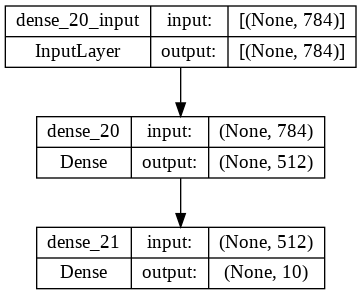

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network7, "my_first_model.png", show_shapes=True)

In [ ]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network7.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 1.7185 - accuracy: 0.5637
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 1.1419 - accuracy: 0.7053
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.9333 - accuracy: 0.7282
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.8289 - accuracy: 0.7416
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.7661 - accuracy: 0.7507


CASO 8

In [ ]:
from keras import models
from keras import layers
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


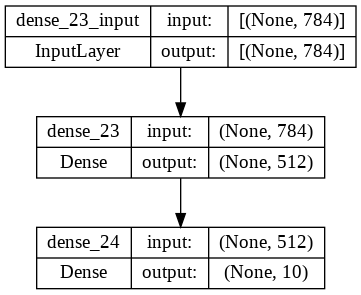

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network8, "my_first_model.png", show_shapes=True)

In [ ]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network8.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.5947 - accuracy: 0.7905
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.4268 - accuracy: 0.8459
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.3858 - accuracy: 0.8577
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3586 - accuracy: 0.8691
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3386 - accuracy: 0.8766
